## WEEK-2 Assignment
Fill the missing places wherever TO DO is mentioned and also understnad what has been done properly


**Also give explanation about each graph and what all you understood about it by adding a text cell below the respective graph**

Do not use Chatgpt . It is a simple assignment. Make a copy of this colab notebook and do your changes and submit it as `Assignment2_yourrollno.ipnyb`


In [125]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [126]:

TICKERS = ["GAIL.NS", "SILVERBEES.NS", "TATAPOWER.NS"] #you can choose assets of your own wish

df = yf.download(TICKERS, period="3y")
prices = df.xs("Close", axis=1, level=0)

prices = prices.fillna(method="ffill").dropna()
prices.head()


/tmp/ipython-input-168032960.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKERS, period="3y")
[*********************100%***********************]  3 of 3 completed
/tmp/ipython-input-168032960.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method="ffill").dropna()


Ticker,GAIL.NS,SILVERBEES.NS,TATAPOWER.NS
Date,,,
2022-12-23,81.953896,66.760002,193.047699
2022-12-26,84.505173,66.720001,199.175400
2022-12-27,85.042274,67.970001,203.636383
2022-12-28,85.758430,66.959999,204.175629
2022-12-29,85.892700,66.959999,201.822571


In [127]:
log_returns = np.log(prices/prices.shift(1))
log_returns=log_returns.dropna()

In [128]:
TRADING_DAYS = 252
daily_expected_returns = log_returns.mean() * TRADING_DAYS
mu = daily_expected_returns * 252                    #TO DO : Calculate Expected return (annual)
cov_matrix =  log_returns.cov()             #TO DO : Calculate Covariance matrix
mu, cov_matrix

(Ticker
 GAIL.NS          63.552860
 SILVERBEES.NS    94.795222
 TATAPOWER.NS     58.533956
 dtype: float64,
 Ticker          GAIL.NS  SILVERBEES.NS  TATAPOWER.NS
 Ticker                                              
 GAIL.NS        0.000397       0.000023      0.000214
 SILVERBEES.NS  0.000023       0.000243      0.000018
 TATAPOWER.NS   0.000214       0.000018      0.000323)

In [129]:
# step controls how finely we explore the portfolio weight space.
# step = 0.02 means weights change in increments of 2%:
# 0.00, 0.02, 0.04, ..., 1.00
# Smaller step  -> more portfolios -> higher accuracy -> slower computation
# Larger step  -> fewer portfolios -> faster but coarser approximation
step = 0.02  # You can consider some other step sizes too
weights = []   # This list will store all VALID portfolios. Each portfolio is a vector: [w1, w2, w3]


# Loop over possible values of weight for Asset 1
for w1 in np.arange(0, 1 + step, step):
    # For each w1, loop over possible values of weight for Asset 2
    for w2 in np.arange(0, 1 + step, step):
        w3 = 1-w1-w2                     # TO DO : What should be w3 in terms of w1 and w2 (Budget constraint)
        if w3>0:                     # TO DO : what should be the condition for the if statement so that it satisfies long-only constraint Change the true to your condition
          weights.append([w1, w2, w3])

weights = np.array(weights)
#TO DO : print the no. of feasible portfolios
print("Number of feasible portfolios:", len(weights))


Number of feasible portfolios: 1280


Some parts of code were autofilled suggested so...

In [130]:
# Lists to store portfolio returns and volatility
portfolio_returns = []
portfolio_volatility = []


# Loop over every feasible portfolio weight vector
for w in weights:
    ret = np.dot(w,mu)                        # TO DO : Calculate return of Portfolio
    var = np.dot(w, np.dot(cov_matrix,w))                       # TO DO : Calculate Volatility

    portfolio_returns.append(ret)
    portfolio_volatility.append(np.sqrt(var))

portfolio_df = pd.DataFrame(weights, columns=["w1", "w2", "w3"])
portfolio_df["Return"] = portfolio_returns
portfolio_df["Volatility"] = portfolio_volatility

portfolio_df.head()


,w1,w2,w3,Return,Volatility
0,0.0,0.00,1.00,58.533956,0.017984
1,0.0,0.02,0.98,59.259181,0.017647
2,0.0,0.04,0.96,59.984407,0.017317
3,0.0,0.06,0.94,60.709632,0.016992
4,0.0,0.08,0.92,61.434857,0.016673


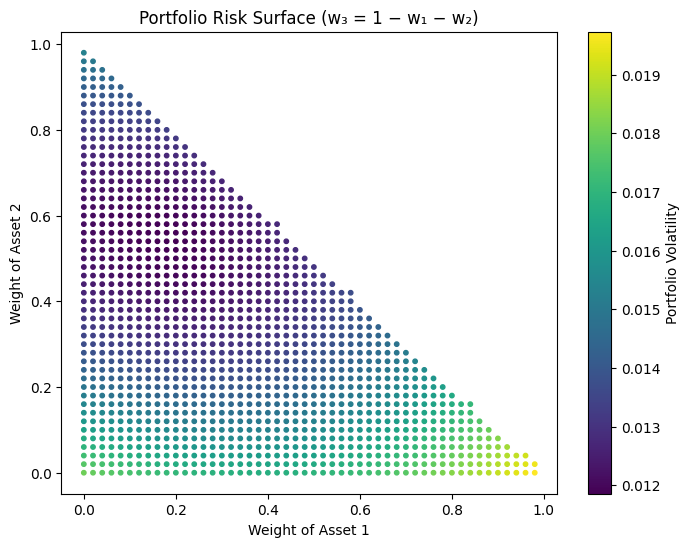

In [131]:
#Visualization for Risk Surface
plt.figure(figsize=(8,6))
sc = plt.scatter(
    portfolio_df["w1"],
    portfolio_df["w2"],
    c=portfolio_df["Volatility"],
    cmap="viridis",
    s=10
)

plt.colorbar(sc, label="Portfolio Volatility")
plt.xlabel("Weight of Asset 1")
plt.ylabel("Weight of Asset 2")
plt.title("Portfolio Risk Surface (w₃ = 1 − w₁ − w₂)")
plt.show()


The surface describes my portfolio's risk ,if i take only asset2, i will have minimal risk,viceversa for asset 2,and at bottom left corner asset 3 has voltalitiy in bw of asset 1,2.It is sort of a curved paper in 3D.With colours showing the depth from z axis.

In [132]:
min_var_idx = np.argmin(portfolio_volatility)                         # TO DO : Discover the Minimum Variance Portfolio
print(min_var_idx)
min_var_portfolio = weights[min_var_idx]                    #To Do : Fill this
print(min_var_portfolio)
print("Variance:", portfolio_volatility[min_var_idx])

399
[0.16 0.54 0.3 ]
Variance: 0.011856023347223054


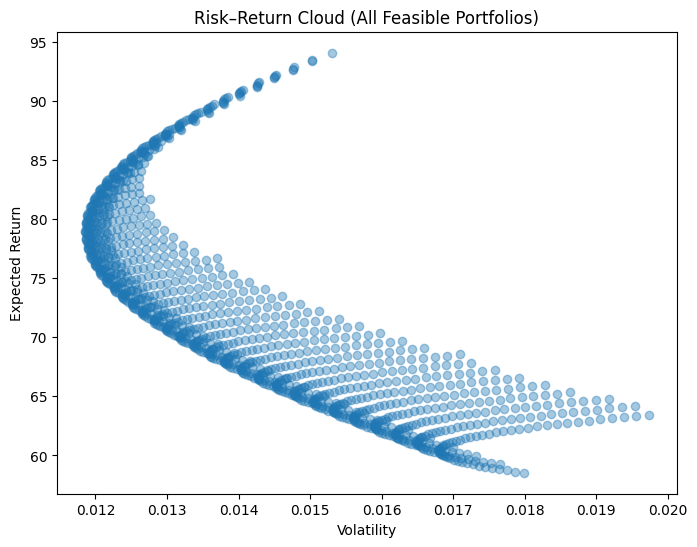

In [133]:
# Risk-Return for all Portfolios (Visualization)
plt.figure(figsize=(8,6))
plt.scatter(
    portfolio_df["Volatility"],
    portfolio_df["Return"],
    alpha=0.4
)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Risk–Return Cloud (All Feasible Portfolios)")
plt.show()


The cloud shows all feasible portfolios of the 3 asset,the lowest point is the minimum return point,the highest point is the highest retrun point.
The leftmost point is the lowest risk point and intrestingly my lowest risk point has more expecteed return than lowest risk point.
The rightmost point is the most volatile point.

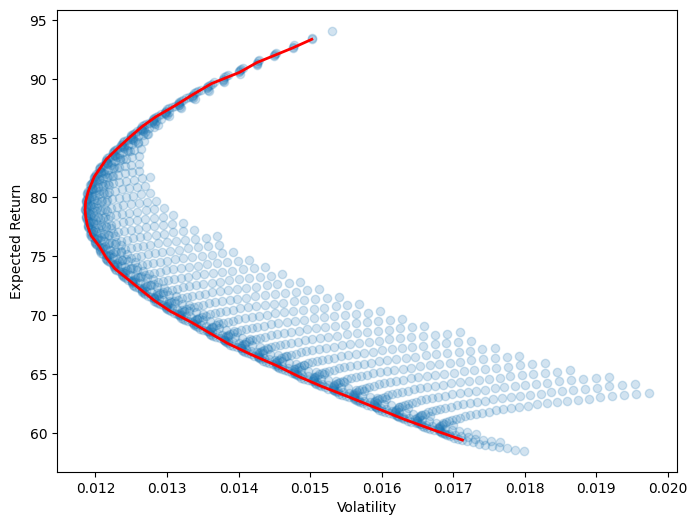

In [134]:
# To DO: Study about the red line what is it called and what it signifies
bins = np.linspace(
    portfolio_df["Return"].min(),
    portfolio_df["Return"].max(),
    40
)

frontier_risk = []
frontier_return = []

for i in range(len(bins)-1):
    mask = (portfolio_df["Return"] >= bins[i]) & (portfolio_df["Return"] < bins[i+1])
    subset = portfolio_df[mask]

    if len(subset) > 0:
        min_row = subset.loc[subset["Volatility"].idxmin()]
        frontier_risk.append(min_row["Volatility"])
        frontier_return.append(min_row["Return"])

plt.figure(figsize=(8,6))
plt.scatter(portfolio_df["Volatility"], portfolio_df["Return"], alpha=0.2)
plt.plot(frontier_risk, frontier_return, color="red", linewidth=2)
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.show()


The efficient frotier is the set of portfolios that give the maximum expected retur for a given level of risk.Any portfolio on the line is the best one for a given risk leevel.If i were a risk averse investor i would choose a portfolio on the red line towards the left.Or If I were a risk taker i will choose the highest point on the red line.

In [135]:
# Controlled stress test on diversification
# Increase covariance to simulate higher correlation. This mimics market stress where assets move together
stressed_cov = cov_matrix            # TO DO : Create a copy of the original covariance matrix

for i in range(len(stressed_cov)):
    for j in range(len(stressed_cov)):
        if i != j:
            stressed_cov.iloc[i, j] *= 2    # Can change the factor from 2 to any other no. too. Try chaging to diff values


In [136]:
# List to store portfolio volatility after correlation stress
stressed_volatility = []

for w in weights:
    var = np.dot(w, np.dot(stressed_cov, w))                            #TO DO :  Calculate Portfolio variance under stressed covariance
    stressed_volatility.append(np.sqrt(var))

portfolio_df["Stressed Volatility"] = stressed_volatility


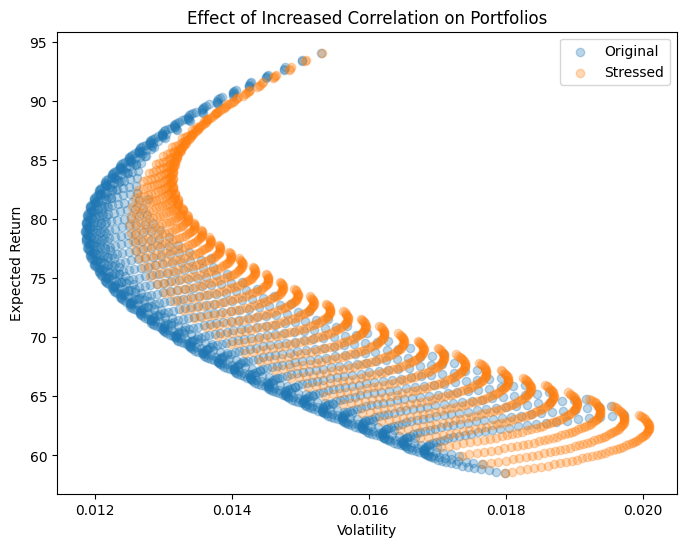

In [137]:
#TO DO : Study this graph. It represents two conditions one with normal corr and one with stressed corr
plt.figure(figsize=(8,6))

plt.scatter(
    portfolio_df["Volatility"],
    portfolio_df["Return"],
    alpha=0.3,
    label="Original"
)

plt.scatter(
    portfolio_df["Stressed Volatility"],
    portfolio_df["Return"],
    alpha=0.3,
    label="Stressed"
)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Effect of Increased Correlation on Portfolios")
plt.legend()
plt.show()


This shows the loss of diversification benefit,when how assets move is altered ,my portfolio becomes volatile.The frontier moves right and down,same return will need more risk.

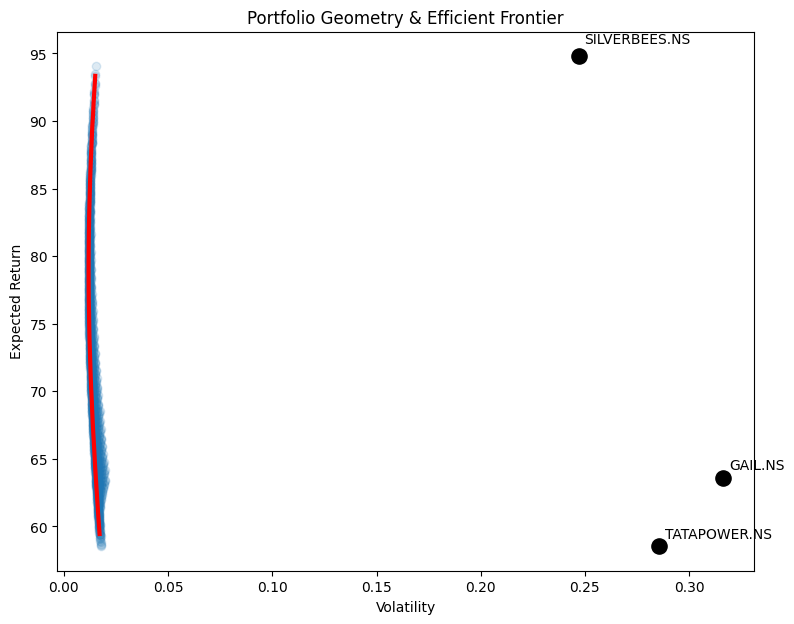

In [138]:
asset_vol = log_returns.std() * np.sqrt(252)                # TO DO : Compute individual asset volatility (annualized)

#Visualization
#TO DO : study this graph
plt.figure(figsize=(9,7))

# Portfolios
plt.scatter(portfolio_df["Volatility"], portfolio_df["Return"], alpha=0.15)

# Efficient Frontier
plt.plot(frontier_risk, frontier_return, color="red", linewidth=3)

# Assets
plt.scatter(asset_vol, mu, s=120, color="black")
for asset in mu.index:
    plt.text(asset_vol[asset]*1.01, mu[asset]*1.01, asset)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Portfolio Geometry & Efficient Frontier")
plt.show()


The cloud has been squished towards the left and individual stocks are marked on the plot.This shows that divesification is overall the better choice than a single stock,low risk and great returns.The risk has been greatly minimised after diversification.